<a href="https://colab.research.google.com/github/SaraAljuraybah/saudi-tech-job-skills-analysis/blob/main/notebooks/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load the Raw Dataset**

The raw dataset collected from the JSearch API was loaded into the notebook using pandas. The dataset contains job postings from the Saudi labor market and includes both structured and unstructured features.

In [1]:
import pandas as pd

df = pd.read_excel("jobs_sa_raw.xlsx")

df.shape

(1024, 31)

**Step 2: Identify Missing Values**

Missing values were analyzed across all columns to identify features with high null counts. Columns with 100% missing values or irrelevant information were considered for removal.

In [2]:
df.isnull().sum().sort_values(ascending=False)

,0
job_posted_at_timestamp,1024
job_max_salary,1024
job_salary_period,1024
job_salary,1024
job_benefits,1024
job_state,1024
job_posted_at_datetime_utc,1024
job_min_salary,1024
employer_logo,635
job_posted_at,391


**Step 3: Remove Irrelevant Features/Empty Columns**

Columns that contained only missing values or were not relevant to the research objective (such as salary-related fields and logos) were removed to improve dataset quality and reduce noise.

In [3]:
cols_to_drop = [
    "job_salary",
    "job_min_salary",
    "job_max_salary",
    "job_salary_period",
    "job_benefits",
    "job_state",
    "job_posted_at_timestamp",
    "job_posted_at_datetime_utc",
    "employer_logo",
    "employer_website"
]

df = df.drop(columns=cols_to_drop)

In [4]:
df.shape

(1024, 21)

After removing irrelevant columns, the dataset was reduced from (1024, 31) to (1024, 22).

**Step 4: Handle Duplicate Records**

The dataset was checked for duplicate rows. Four duplicate records were identified and removed to ensure the integrity and reliability of the analysis.

In [5]:
df.duplicated().sum()

np.int64(4)

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(1020, 21)

After removing duplicate records, the dataset size became (1020, 22).

In [8]:
df["job_description"].head()

,job_description
0,Be the change. Join the world’s most visionary...
1,About Mozn\n\nMOZN is a leading Enterprise AI ...
2,About MOZN\n\nMOZN is a leading Enterprise AI ...
3,A data solutions company located in Riyadh is ...
4,The Data Scientist is responsible for deliveri...


**Step 5: Text Preprocessing**

Since job descriptions are unstructured textual data, preprocessing was applied. This included converting text to lowercase, removing special characters, eliminating newline characters, and normalizing whitespace.
A new column named clean_description was created to preserve the original text

In [9]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["clean_description"] = df["job_description"].apply(clean_text)

In [10]:
df.shape

(1020, 22)

**Step 6: Export Cleaned Dataset**

After completing the cleaning process, the final cleaned dataset was exported as a CSV file for further exploratory data analysis (EDA) and modeling.

In [11]:
df.to_csv("jobs_sa_cleaned.csv", index=False)

# Step 7: Exploratory Data Analysis (EDA)

اول شي الشيب حق الداتا , كم عامود و صف  و نوع البيانات و اهم المتغيرات

In [20]:
print("Shape:", df.shape)



Shape: (1020, 22)


In [19]:
df.columns

Index(['job_id', 'job_title', 'employer_name', 'job_publisher',
       'job_employment_type', 'job_employment_types', 'job_apply_link',
       'job_apply_is_direct', 'apply_options', 'job_description',
       'job_is_remote', 'job_posted_at', 'job_location', 'job_city',
       'job_country', 'job_latitude', 'job_longitude', 'job_google_link',
       'job_onet_soc', 'job_onet_job_zone', 'search_query',
       'clean_description'],
      dtype='object')

In [18]:
df.describe(include='all')

,job_id,job_title,employer_name,job_publisher,job_employment_type,job_employment_types,job_apply_link,job_apply_is_direct,apply_options,job_description,...,job_location,job_city,job_country,job_latitude,job_longitude,job_google_link,job_onet_soc,job_onet_job_zone,search_query,clean_description
count,1020,1020,1020,1020,1009,1020,1020,1020,1020,1020,...,1020,774,1020,1020.000000,1020.000000,1020,1.003000e+03,1002.000000,1020,1020
unique,939,798,420,93,6,6,939,2,940,903,...,22,17,1,NaN,NaN,939,NaN,NaN,10,889
top,0MP7Wcw86R9vgZiIAAAAAA==,AI Engineer,Master-Works,BeBee SA,دوام كامل,['FULLTIME'],https://sa.bebee.com/job/888d204d4b30246aa394a...,False,"[{'publisher': 'BeBee SA', 'apply_link': 'http...",A leading data analytics firm is seeking a Sen...,...,الرياض,الرياض,SA,NaN,NaN,https://www.google.com/search?q=jobs&gl=sa&hl=...,NaN,NaN,full stack developer,a leading data analytics firm is seeking a sen...
freq,3,6,59,179,949,949,3,938,3,8,...,597,597,1020,NaN,NaN,3,NaN,NaN,137,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.240112,45.652308,NaN,1.803071e+07,4.157685,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.256404,2.491162,NaN,8.682926e+06,0.598938,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.889359,36.566191,NaN,1.120210e+07,2.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.885942,45.079162,NaN,1.511110e+07,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.713552,46.675296,NaN,1.511320e+07,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24.713552,46.675296,NaN,1.511330e+07,5.000000,NaN,NaN


# Job Titles Distribution





 We can see that the most frequent job title is :
  

*  AI Engineer
*  Backend Developer
*  Remote Senior Data Engineer - ETL, Python & ML Architect
*  Senior Data Engineer





 indicating that the Saudi job market has high demand for this role.





In [21]:
top_titles = df["job_title"].value_counts().head(10)
top_titles

,count
job_title,
AI Engineer,6
Backend Developer,6
"Remote Senior Data Engineer - ETL, Python & ML Architect",6
Senior Data Engineer,6
Data Scientist,5
"Software Engineer - Backend (Mid-Level, Remote)",5
"Senior Data Engineer - Remote, Flexible Hours & Growth",5
Senior Software Engineer,4
Data Analyst,4


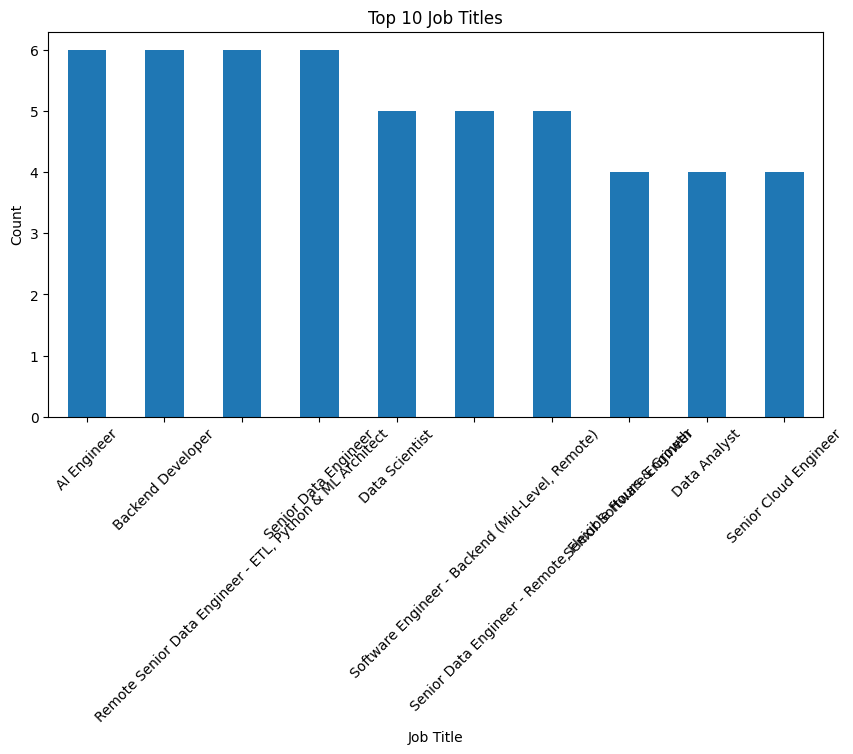

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top_titles.plot(kind='bar')
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# City Distribution



**Riyadh** appears to have the highest concentration of data-related jobs

In [24]:
top_cities = df["job_city"].value_counts().head(10)
top_cities

,count
job_city,
الرياض,597
جدة,62
مكة,31
الدمام,22
الخبر,14
الظهران,13
المدينة المنورة,7
جازان,6
ينبع,6


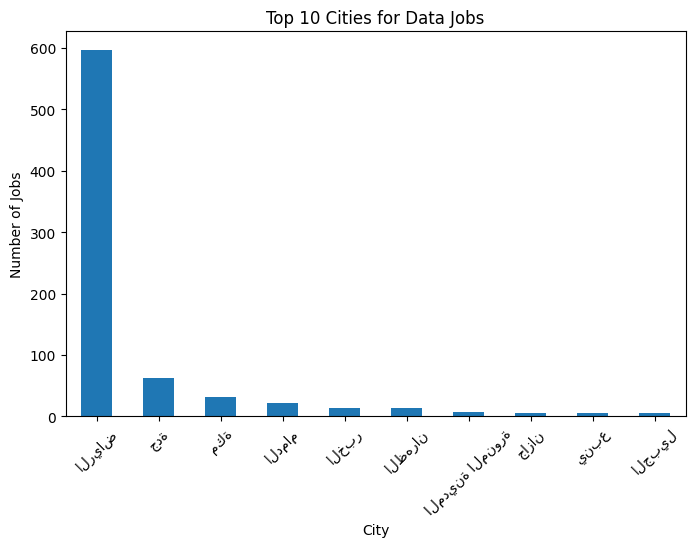

In [25]:
plt.figure(figsize=(8,5))
top_cities.plot(kind='bar')
plt.title("Top 10 Cities for Data Jobs")
plt.xlabel("City")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

# Remote vs On-site

Most jobs are on-site, suggesting that remote opportunities are still limited in the Saudi market.

In [26]:
df["job_is_remote"].value_counts()

,count
job_is_remote,
False,1020


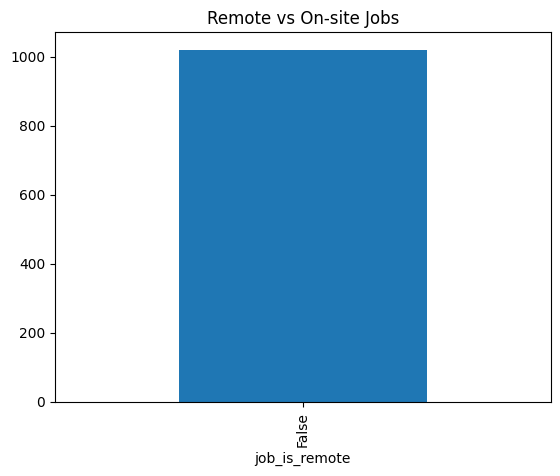

In [27]:
df["job_is_remote"].value_counts().plot(kind='bar')
plt.title("Remote vs On-site Jobs")
plt.show()

# **Skill Frequency Analysis**

In this step we are extracting skills from job descriptions and count their occurrences to identify the most demanded skills in Saudi data and AI job postings.

“The extraction is keyword-based and may under/over-count some skills depending on how they are mentioned.”

In [79]:
import pandas as pd
import re

# 1) Skill dictionary: key = اسم موحد, values = صيغ ممكن تطلع في النص
skill_dict = {
    "python": ["python"],
    "sql": ["sql", "structured query language"],
    "excel": ["excel", "ms excel", "microsoft excel", "spreadsheet", "spreadsheets", "google sheets"],
    "power bi": ["power bi", "powerbi"],
    "tableau": ["tableau"],
    "machine learning": ["machine learning", "ml"],
    "deep learning": ["deep learning", "dl"],
    "nlp": ["nlp", "natural language processing"],
    "tensorflow": ["tensorflow"],
    "pytorch": ["pytorch"],
    "aws": ["aws", "amazon web services"],
    "azure": ["azure", "microsoft azure"],
    "gcp": ["gcp", "google cloud"],
    "spark": ["spark", "apache spark"],
    "docker": ["docker"],
    "kubernetes": ["kubernetes", "k8s"],
    "statistics": ["statistics", "statistical"],
    "data visualization": ["data visualization", "visualization", "data visualisation"],
        "communication": ["communication", "communication skills"],
    "teamwork": ["teamwork", "collaboration", "collaborative"],
    "problem solving": ["problem solving", "problem-solving"],
    "critical thinking": ["critical thinking"],
"leadership": ["leadership", "leadership skills"],
    "time management": ["time management"],
    "presentation": ["presentation", "presenting"],
    "stakeholder management": ["stakeholder management", "stakeholder management skills"],
    "attention to detail": ["attention to detail", "detail oriented", "detail-oriented"]

}


# 2) دالة استخراج مهارات من نص واحد
def extract_skills(text, skill_dict):
    if pd.isna(text):
        return []
    found = set()
    for skill, patterns in skill_dict.items():
        for p in patterns:
            # نستخدم حدود الكلمات قدر الإمكان لتقليل الأخطاء
            if re.search(r"\b" + re.escape(p) + r"\b", text):
                found.add(skill)
                break
    return list(found)

# 3) ننشئ عمود skills_extracted
df["skills_extracted"] = df["clean_description"].apply(lambda x: extract_skills(x, skill_dict))
# 4) نحسب التكرار
skills_series = df["skills_extracted"].explode().dropna()
skill_counts = skills_series.value_counts()

skill_counts.head(20)

,count
skills_extracted,
python,391
communication,363
teamwork,361
sql,311
machine learning,236
gcp,185
aws,176
azure,155
docker,137


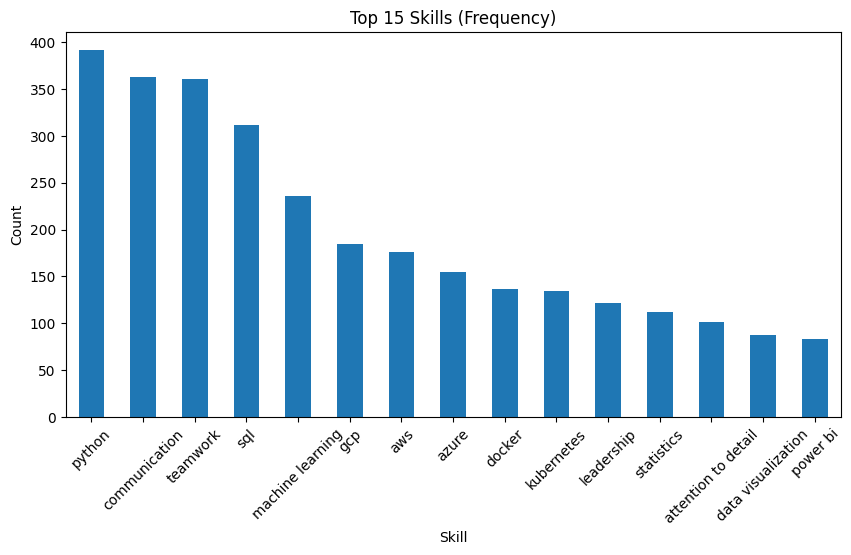

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
skill_counts.head(15).plot(kind="bar")
plt.title("Top 15 Skills (Frequency)")
plt.xlabel("Skill")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [81]:
skill_percent = (skill_counts / len(df) * 100).round(2)
print("percintage")
skill_percent.head(15)

percintage


,count
skills_extracted,
python,38.33
communication,35.59
teamwork,35.39
sql,30.49
machine learning,23.14
gcp,18.14
aws,17.25
azure,15.20
docker,13.43


# **Skill Category Distribution**

Group extracted skills into categories and calculate their proportions to understand the balance of skill types requested by employers.

In [72]:
skill_category = {
    # Technical
    "python": "Technical",
    "sql": "Technical",
    "excel": "Technical",
    "power bi": "Technical",
    "tableau": "Technical",
    "aws": "Technical",
    "azure": "Technical",
    "gcp": "Technical",
    "docker": "Technical",
    "kubernetes": "Technical",
    "spark": "Technical",
    "hadoop": "Technical",
    "tensorflow": "Technical",
    "pytorch": "Technical",

    # Analytical
    "machine learning": "Analytical",
    "deep learning": "Analytical",
    "nlp": "Analytical",
    "statistics": "Analytical",
    "data visualization": "Analytical",

    # Soft
    "communication": "Soft",
    "teamwork": "Soft",
    "problem solving": "Soft",
    "critical thinking": "Soft",
    "leadership": "Soft",
    "time management": "Soft",
    "presentation": "Soft",
    "stakeholder management": "Soft",
    "attention to detail": "Soft"
}

def count_categories(skills):
    counts = {"Technical": 0, "Analytical": 0, "Soft": 0}
    for s in skills:
        cat = skill_category.get(s)
        if cat:
            counts[cat] += 1
    return pd.Series(counts)

cat_counts = df["skills_extracted"].apply(count_categories)

df["Technical_count"] = cat_counts["Technical"]
df["Analytical_count"] = cat_counts["Analytical"]
df["Soft_count"] = cat_counts["Soft"]

category_totals = df[["Technical_count","Analytical_count","Soft_count"]].sum()
category_percent = (category_totals / category_totals.sum() * 100).round(2)

category_totals, category_percent

(Technical_count     1867
 Analytical_count     583
 Soft_count          1266
 dtype: int64,
 Technical_count     50.24
 Analytical_count    15.69
 Soft_count          34.07
 dtype: float64)

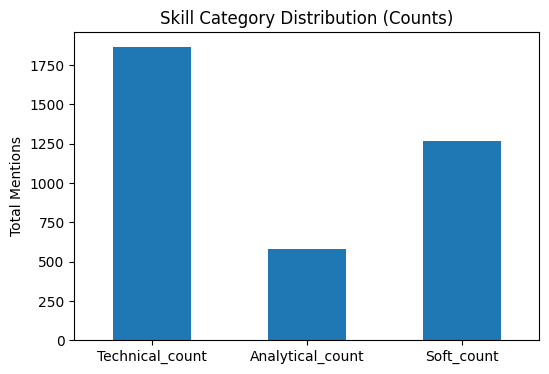

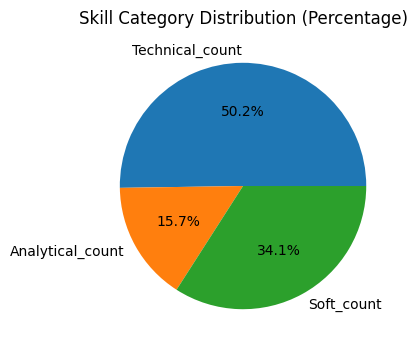

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
category_totals.plot(kind="bar")
plt.title("Skill Category Distribution (Counts)")
plt.ylabel("Total Mentions")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6,4))
category_percent.plot(kind="pie", autopct="%1.1f%%")
plt.title("Skill Category Distribution (Percentage)")
plt.ylabel("")
plt.show()



Extracted skills were categorized into **Technical**, **Analytical**, and **Soft** skills. Results show that **Technical skills represent 50.24%** of total skill mentions, followed by **Soft skills at 34.07%**, and **Analytical skills at 15.69%**. This indicates that Saudi data and AI job postings strongly emphasize practical technical tools, while also frequently requiring interpersonal and communication skills. Analytical competencies appear prominently but are more role-specific.

# **Role-Based Comparative Analysis**

مقارنة حسب الوظيفة

Data Scientist vs Data Analyst

In [85]:
ds = df[df["job_title"].str.contains("Data Scientist", case=False, na=False)]
da = df[df["job_title"].str.contains("Data Analyst", case=False, na=False)]

print("Data Scientist")
ds[skills_list].sum().sort_values(ascending=False).head(5)

Data Scientist


,0
python,45
machine learning,41
sql,25
statistics,23
excel,19


In [86]:
print("Data Analyst")

da[skills_list].sum().sort_values(ascending=False).head(5)

Data Analyst


,0
sql,45
excel,44
power bi,36
python,27
tableau,24
